# 3 Final Project Submission
* name: Leticia D Drasler (Fernandes)
* pace: Part time
* Scheduled project review data/time: November 16th, 2021, 08:00 AM (Mountain Time)
* Course Instructor: Abhineet
* Blog post URL:https://callableleticia.blog/2021/11/14/3rd-project-machine-learning/
* GitHub repository:https://github.com/lddrasler/Tanzania_Water_Pumps

## Importing packages and undarstanding Data

In [38]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_values = pd.read_csv('training_set_values.csv', index_col='id')
df_labels = pd.read_csv('training_set_labels.csv', index_col='id')

df_values.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
df_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

In [4]:
list(df_values.columns.values)

['amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [5]:
df_labels.head(5)

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


In [6]:
df_labels.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

## Plotting variables to have a better undarstading and visualization

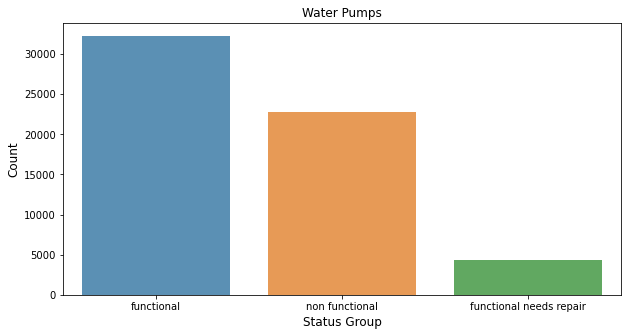

In [7]:
func_pump = df_labels['status_group'].value_counts()
func_pump = func_pump[:100,]
plt.figure(figsize=(10,5))
sns.barplot(func_pump.index, func_pump.values, alpha=0.8)
plt.title('Water Pumps')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Status Group', fontsize=12)
plt.show()

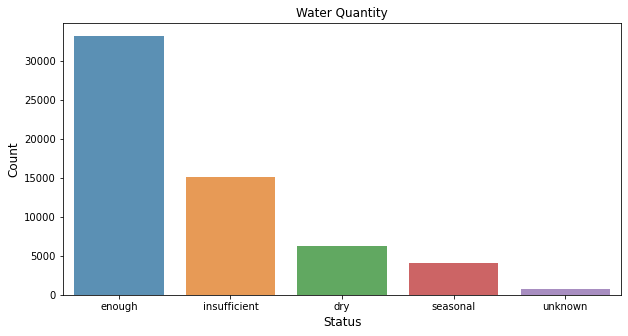

In [8]:
quantity = df_values['quantity'].value_counts()
quantity = quantity[:100,]
plt.figure(figsize=(10,5))
sns.barplot(quantity.index, quantity.values, alpha=0.8)
plt.title('Water Quantity')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Status', fontsize=12)
plt.show()

## Joing the two dataset, values and labels.

In [9]:
df_training = pd.concat([df_labels, df_values], axis=1, join='inner')
df_training.head()

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


# Filling NaN and Dropping Columns

In [10]:
to_drop =['num_private','date_recorded','longitude','latitude','subvillage',
          'region_code','district_code','lga','ward','recorded_by',
          'scheme_management','scheme_name', 'extraction_type_group','extraction_type_class',
         'management_group','payment','quality_group','quantity_group',
          'source_type', 'source_class','waterpoint_type_group','wpt_name']
df_training.drop(to_drop,axis=1, inplace=True)

In [11]:
df_training.public_meeting.fillna(False,inplace=True)

In [12]:
df_training.permit.fillna(False,inplace=True)

# Transforming and Binning values
* Funder
* Installer
* Construction Year
* Extraction
* Management
* Population

In [13]:
funder_bins=list(df_training.funder.value_counts().index[:8])
funder_bins

['Government Of Tanzania',
 'Danida',
 'Hesawa',
 'Rwssp',
 'World Bank',
 'Kkkt',
 'World Vision',
 'Unicef']

In [14]:
funder_dict=dict(zip(funder_bins,range(1,len(funder_bins)+1)))
funder_dict

{'Government Of Tanzania': 1,
 'Danida': 2,
 'Hesawa': 3,
 'Rwssp': 4,
 'World Bank': 5,
 'Kkkt': 6,
 'World Vision': 7,
 'Unicef': 8}

In [15]:
df_training['funder']=df_training['funder'].apply(
    lambda x: funder_dict[x] if x in funder_bins else 0)

In [16]:
installers=list(df_training.installer.value_counts()[:10].index)
installers.remove('0')
installers_dict = dict(zip(installers,range(1,len(installers)+1)))
df_training['installer']=df_training['installer'].apply(
    lambda x: installers_dict[x] if x in installers else 0)

In [17]:
management=list(df_training.management.value_counts()[:4].index)
management_dict = dict(zip(management,range(1,len(management)+1)))
df_training['management']=df_training['management'].apply(
    lambda x: management_dict[x] if x in management else 0)

In [18]:
max_year=df_training['construction_year'].describe()['max']
max_year = float(max_year)
min_year=df_training['construction_year'][df_training[
    'construction_year']!=0].sort_values(ascending=True).iloc[0]
min_year = float(min_year)
year_bins=np.linspace(min_year,max_year,7)
year_bins=[np.round(x) for x in year_bins ]
year_bins=[0,1]+year_bins[1:]
year_bins

[0, 1, 1969.0, 1978.0, 1986.0, 1995.0, 2004.0, 2013.0]

In [19]:
df_training['construction_year']=pd.cut(df_training['construction_year'],[
    0,1,1960,1969,1978,1987,1995,2004,2013
],include_lowest=True,labels=[1,2,3,4,5,6,7,8])

In [20]:
extractions=list(df_training.extraction_type.value_counts()[0:4].index)
extractions.remove('other')
extractions_dict = dict(zip(extractions,range(1,len(extractions)+1)))
extractions_dict

{'gravity': 1, 'nira/tanira': 2, 'submersible': 3}

In [21]:
df_training['extraction_type']=df_training['extraction_type'].apply(
    lambda x: extractions_dict[x] if x in extractions else 0
)

In [22]:
df_training.population=df_training.population.apply(
    lambda x: 1 if x>1 else 0
)

In [23]:
df_training.management.value_counts()

1    40507
0     6910
2     6515
3     2933
4     2535
Name: management, dtype: int64

## Creating Target Y and Predictor X

In [24]:
categoricals=['funder','installer','management','public_meeting',
              'construction_year','extraction_type','permit','basin',
              'region','population','water_quality','quantity','source',
              'waterpoint_type','payment_type'
             ]

In [25]:
status_map={'non functional':0,'functional':1,'functional needs repair':2}
y=df_training['status_group'].replace(status_map)
X=df_training.drop('status_group',axis=1)

In [26]:
X=pd.get_dummies(X,columns=categoricals,drop_first=True)

In [27]:
X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size = 0.25, random_state=42)

## Modeling 

##### DecisionTree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [30]:
clf.decision_path(X_test)

<14850x31 sparse matrix of type '<class 'numpy.int64'>'
	with 74250 stored elements in Compressed Sparse Row format>

In [31]:
clf.feature_importances_

array([0.03763677, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01667174, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00516299, 0.        ,
       0.        , 0.        , 0.        , 0.00946915, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01740241, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0009062 ,
       0.        , 0.        , 0.        , 0.00440489, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.17638379, 0.13960131, 0.20064687, 0.     

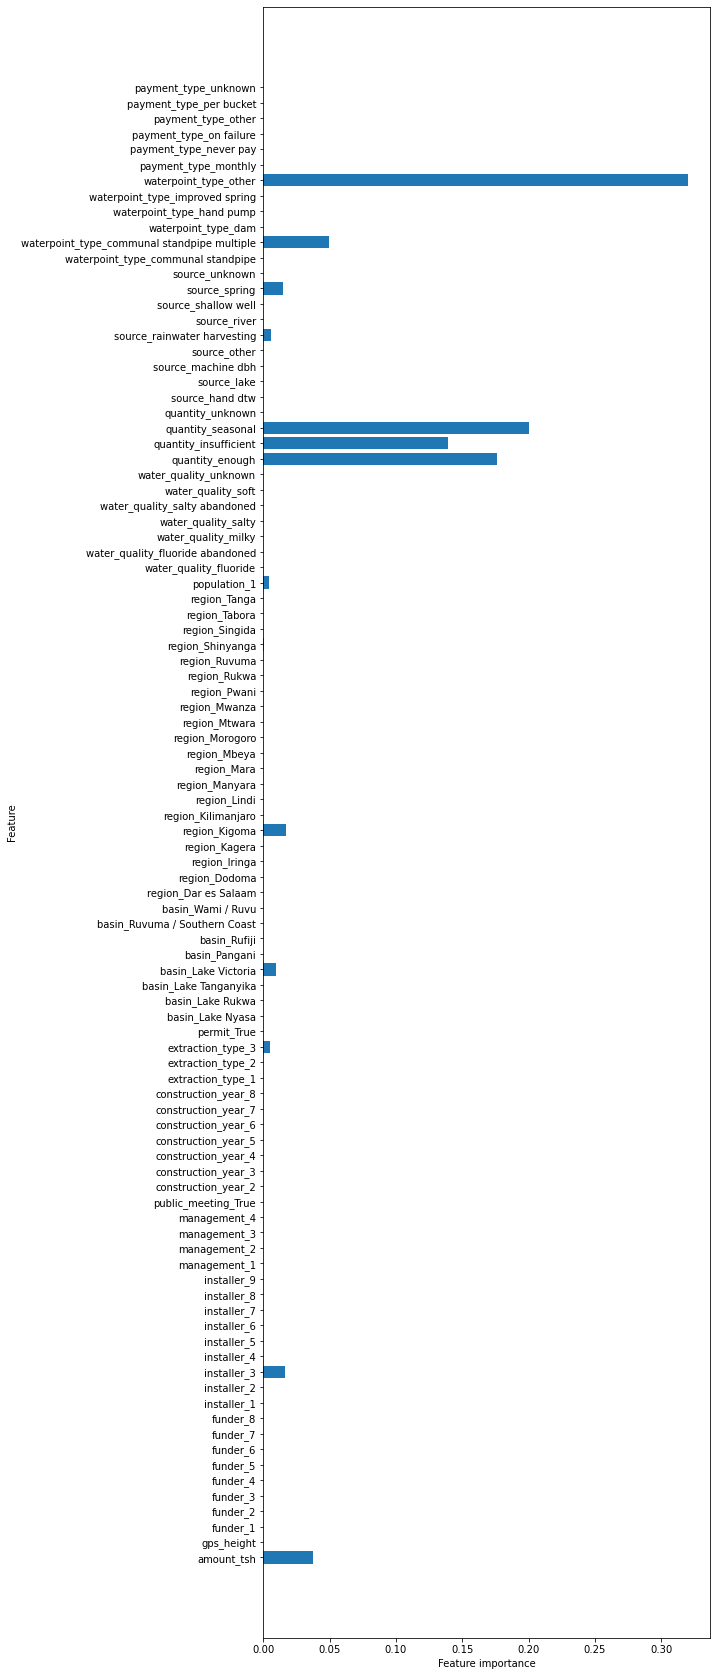

In [32]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,30))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(clf)

In [33]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (12,12), dpi=900)
tree.plot_tree(clf,
               feature_names = X_train.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [34]:
y_preds=clf.predict(X_test)

In [39]:
accuracy_score(y_test,y_preds)

0.7034343434343434

In [40]:
confusion_matrix(y_test,y_preds)

array([[2618, 3001,   59],
       [ 306, 7746,   46],
       [  73,  919,   82]], dtype=int64)

In [41]:
# DecisionTree does not has a good perfomance 
# Confusion Matrix also does not look good

##### ROC CURVE

In [42]:
from sklearn.metrics import roc_curve, auc

# Identify the optimal tree depth for given data

max_depth = range(1,32)
roc_train = []
roc_test = []
accuracy_scores_train=[]
accuracy_scores_test=[]
for test_parm in max_depth:
    dt = DecisionTreeClassifier(random_state=10,max_depth=test_parm)
    dt.fit(X_train, y_train)
    y_pred_train = dt.predict(X_train)
    y_pred_test = dt.predict(X_test)
    accuracy_scores_train.append((test_parm,accuracy_score(y_pred_train,y_train)))
    accuracy_scores_test.append((test_parm,accuracy_score(y_pred_test,y_test)))


In [43]:
accuracy_scores_train

[(1, 0.6168125701459035),
 (2, 0.6201122334455668),
 (3, 0.6780246913580247),
 (4, 0.7053872053872053),
 (5, 0.7180920314253647),
 (6, 0.7256341189674523),
 (7, 0.7344781144781145),
 (8, 0.7453423120089787),
 (9, 0.7536026936026936),
 (10, 0.7635914702581369),
 (11, 0.7753535353535354),
 (12, 0.7889786756453423),
 (13, 0.800695847362514),
 (14, 0.8149943883277216),
 (15, 0.8282379349046016),
 (16, 0.8404264870931537),
 (17, 0.8523456790123457),
 (18, 0.8637037037037038),
 (19, 0.874769921436588),
 (20, 0.8837037037037037),
 (21, 0.8925028058361392),
 (22, 0.899753086419753),
 (23, 0.9059708193041527),
 (24, 0.9111560044893379),
 (25, 0.915712682379349),
 (26, 0.9202693602693602),
 (27, 0.923658810325477),
 (28, 0.9269809203142536),
 (29, 0.9297643097643098),
 (30, 0.9320763187429854),
 (31, 0.9336026936026937)]

In [44]:
accuracy_scores_test

[(1, 0.6186531986531987),
 (2, 0.616902356902357),
 (3, 0.6715824915824916),
 (4, 0.7034343434343434),
 (5, 0.7122558922558923),
 (6, 0.7195286195286196),
 (7, 0.7260606060606061),
 (8, 0.7342760942760943),
 (9, 0.7406734006734007),
 (10, 0.7444444444444445),
 (11, 0.7506397306397307),
 (12, 0.7562962962962962),
 (13, 0.7608754208754209),
 (14, 0.7628956228956228),
 (15, 0.7633670033670034),
 (16, 0.7616161616161616),
 (17, 0.7624242424242424),
 (18, 0.7638383838383839),
 (19, 0.7607407407407407),
 (20, 0.7639057239057239),
 (21, 0.7596632996632997),
 (22, 0.7575757575757576),
 (23, 0.7564983164983164),
 (24, 0.7574410774410775),
 (25, 0.7551515151515151),
 (26, 0.7534680134680135),
 (27, 0.7530639730639731),
 (28, 0.7502356902356903),
 (29, 0.74996632996633),
 (30, 0.75010101010101),
 (31, 0.7489562289562289)]

(1.0, 30.0)

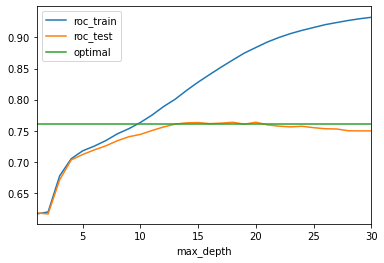

In [45]:
# Identify the optimal tree depth for given data

roc_train=[x[1] for x in accuracy_scores_train]
roc_test=[x[1] for x in accuracy_scores_test]
df_result=pd.DataFrame({'roc_train':roc_train,'roc_test':
                        roc_test,'max_depth':list(max_depth)})
df_result=df_result.set_index('max_depth')
df_result['optimal']=pd.Series(index=list(max_depth), data=np.ones(len(
    max_depth))*df_result.roc_test.iloc[15])

df_result.plot()
plt.xlim([1, 30])

In [46]:
df_result.iloc[15]

roc_train    0.840426
roc_test     0.761616
optimal      0.761616
Name: 16, dtype: float64

In [47]:
# ROC CURVE we are able to show the best "max_depth" is around 15
# I decided not to use the DecisionTree results

##### BaggingClassifier, RandomForest

In [48]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

bagged_tree = BaggingClassifier(DecisionTreeClassifier(
    criterion='gini', max_depth=15), n_estimators=20)

bagged_tree.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15),
                  n_estimators=20)

In [49]:
bagged_tree.score(X_train,y_train)

0.843030303030303

In [50]:
bagged_tree.score(X_test,y_test)

0.7794612794612794

In [51]:
rfc = RandomForestClassifier(criterion='gini', max_depth=5, n_estimators=10)

rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [52]:
rfc.score(X_train,y_train)

0.697351290684624

In [53]:
rfc.score(X_test,y_test)


0.6956228956228956

In [54]:
# BaggingClassifier has a better perfomance comparing to RandonForest 
# I decided not to use RandonForest results 

### Accurancy Score BaggingClassifier

In [55]:
# Accurancy Score on BaggingClassifier

accuracy_scores_train={}
accuracy_scores_test={}
max_depth=range(1,20)
for test_parm in max_depth:
    dt = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=test_parm), n_estimators=20)
    dt.fit(X_train, y_train)
    accuracy_scores_train[test_parm]=dt.score(X_train,y_train)
    accuracy_scores_test[test_parm]=dt.score(X_test,y_test)

In [56]:
accuracy_scores_train

{1: 0.6168125701459035,
 2: 0.6201122334455668,
 3: 0.6778900112233446,
 4: 0.7116498316498316,
 5: 0.7198877665544332,
 6: 0.7287766554433222,
 7: 0.7404489337822671,
 8: 0.7503254769921437,
 9: 0.7597979797979798,
 10: 0.7738047138047138,
 11: 0.7871156004489338,
 12: 0.801324354657688,
 13: 0.8168350168350168,
 14: 0.8305499438832772,
 15: 0.8424017957351291,
 16: 0.8560942760942761,
 17: 0.8660606060606061,
 18: 0.8757126823793491,
 19: 0.8872053872053872}

<AxesSubplot:>

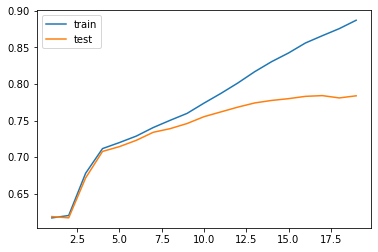

In [57]:
df_test=pd.DataFrame(accuracy_scores_test.values(),index=accuracy_scores_test.keys(),columns=['test'])
df_train=pd.DataFrame(accuracy_scores_train.values(),index=accuracy_scores_train.keys(),columns=['train'])
df_train.join(df_test).plot()

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred_test = bagged_tree.predict(X_test)
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      5678
           1       0.76      0.92      0.83      8098
           2       0.54      0.22      0.31      1074

    accuracy                           0.78     14850
   macro avg       0.72      0.61      0.63     14850
weighted avg       0.78      0.78      0.77     14850

[[3909 1695   74]
 [ 538 7433  127]
 [ 138  703  233]]


In [59]:
# Overall the Confusion Matrix on BaggingClassifier does not have a better perfomance than the DecisonTree

##### AdaBoostClassifier, GradientBoostingClassifier

In [60]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)
gbt_clf = GradientBoostingClassifier(random_state=42)
adaboost_clf.fit(X_train,y_train)
gbt_clf.fit(X_train,y_train)


GradientBoostingClassifier(random_state=42)

In [61]:
# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [62]:
accuracy_score(y_test,gbt_clf_test_preds)

0.7490909090909091

In [63]:
accuracy_score(y_test,adaboost_test_preds)

0.7155555555555555

In [64]:
# GradientBoostingClassifier does slightly better than AdaBoostClassifier
# Still they both do not have a great perfomace

##### XGBOOST

In [65]:
from xgboost import XGBClassifier

# Instantiate XGBClassifier
XGB = XGBClassifier()

# Fit XGBClassifier
XGB.fit(X_train, y_train)

# Predict on training and test sets
training_preds = XGB.predict(X_train)
test_preds = XGB.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

training_accuracy,test_accuracy

[21:00:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.8182042648709316, 0.7851851851851852)

In [66]:
# XGBOOST has a good perfomance overall 
# The gap between test and train is small
# The best results comparing to any other model 
# I decided to keep it as my model 

##### Parameter Grid

In [67]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'learning_rate': [0.02, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 1],
    'n_estimators': [100],
}

param_grid_2 = {
    'learning_rate': [0.2, 0.3],
    'max_depth': [6],
    'min_child_weight': [1],
    'subsample': [0.5],
    'n_estimators': [100],
}

grid_clf = GridSearchCV(XGB, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

[21:00:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:00:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[21:09:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:10:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:10:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1,
                                     objective='multi:softprob', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, subsample=1,
                                     tree

In [68]:
best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)


Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.5


In [69]:
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

training_accuracy,test_accuracy

(0.8077441077441078, 0.7835016835016835)

In [70]:
print(confusion_matrix(y_test, test_preds))

[[4044 1587   47]
 [ 634 7355  109]
 [ 160  678  236]]


<AxesSubplot:>

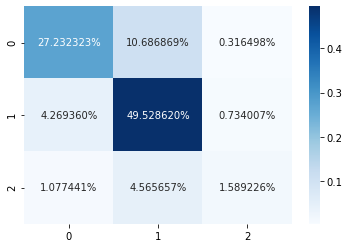

In [71]:
cf_matrix = confusion_matrix(y_test,test_preds)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='2%',cmap='Blues')